# Exploring the Relationship Between Age, Gender, and Playtime on a Research Minecraft Server

# Introduction

## Background

Video games offer a rich source of behavioral data that allows researchers to explore how players interact with the digital environment. By examining how players’ demographic characteristics relate to their behavior in the virtual world, we can gain insights that help identify the types of players most likely to contribute valuable data, which can inform targeted recruitment and marketing strategies.

A Computer Science research group at the University of British Columbia is collecting data through a customized MineCraft server designed for research purposes. As players navigate the game, their actions and demographic details are recorded, creating a valuable dataset for analyzing patterns in player behavior.

## Question

This project aims to identify which types of players are most likely to contribute a large amount of data, enabling targeted recruitment efforts. Specifically, I will investigate the following question: **Can age and gender predict the total playtime of players on the MineCraft research server?**

The response variable in this analysis is total playtime, while the explanatory variables (predictors) are age and gender. Identifying such relationships can guide recruitment strategies by highlighting which player profiles are more likely to engage for longer periods.

## Data Description

The dataset used in this analysis is players.csv, which contains demographic information about each unique player on the MineCraft research server. This dataset provides the explanatory variables necessary to investigate how player characteristics relate to total playtime.

In [1]:
# Load Required Libraries
library(tidyverse)   # data wrangling, visualization, reading files
library(tidymodels)  # modeling and machine learning

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Load Players Dataset

players <- read_csv("data/players.csv")

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [3]:
# Number of observations

nrow(players)

[1] 196

There are **196 observations** in the players dataset.

In [4]:
# Number of columns

ncol(players)

[1] 7

There are **7 columns** in the players dataset.

The **key variables** used are:

- `Age` (numeric): Age of the player in years

- `gender` (categorical): Gender of the player (e.g., male, female, Non-binary)

- `played_hours` (numeric): Total amount of time the player has spent on the server (in hours), which is the response variable

Not all variables in the dataset were used; only Age, gender, and played_hours were selected for this analysis to focus on the relationship between demographics and gameplay duration.

**Data issues**:

- Some players have missing or unspecified gender values (prefer not to say).

- Age values are self-reported and may contain inaccuracies.

- Outliers in playtime suggest some players have exceptionally high engagement, which may affect analysis.

- The data set is relatively small, risking unstable predictions and limited representativeness.

Although another dataset, sessions.csv, is available and includes data on individual play sessions, it was not used in this analysis.

# Methods & Results

## Loading data

The players dataset was provided as CSV files, so `read_csv()` is the most efficient and readable way to load it.

In [5]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


## Wrangling and Cleaning data

Since the only variables I will be using are `Age`, `gender`, and `played_hours`, I will retain only these columns for modeling.

The `Age` column contains rows with missing values (NAs). These rows were excluded to ensure that the `Age` predictor used in modeling was complete and did not contain missing values, which could affect model training.

Regression models in R need categorical variables to be explicitly marked as factors, otherwise they are treated as numeric or character types. I converted `gender` to a factor (categorical variable), to ensure that the model properly accounts for the group differences rather than assuming a continuous relationship.

In [6]:
players <- players |>
    select(Age, gender, played_hours) |>
    drop_na(Age) |>
    mutate(gender = as.factor(gender))
players

Age,gender,played_hours
<dbl>,<fct>,<dbl>
9,Male,30.3
17,Male,3.8
17,Male,0.0
21,Female,0.7
21,Male,0.1
17,Female,0.0
19,Female,0.0
21,Male,0.0
17,Male,0.1


## Summary of Cleaned Dataset

Summary statistics were computeted to understand the distribution of the data and to detect potential outliers, imbalanced catagories etc.

In [7]:
players_summary <- players |>
    summarise(
        min_age = min(Age),
        max_age = max(Age),
        mean_age = mean(Age),
        min_play = min(played_hours),
        max_play = max(played_hours),
        mean_play = mean(played_hours),
        )
players_summary

min_age,max_age,mean_age,min_play,max_play,mean_play
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,50,20.52062,0,223.1,5.904639


The ages in the players dataset range from **8 to 50 years old**, with a **mean of approximately 20.5 years**.

Play time ranges from **0 to 223.1 hours**, but the **mean is only 5.9 hours**. This indicates potential **outliers**, which may affect model performance and should be considered when choosing regression models.

## Exploratory Data Analysis and Visualization

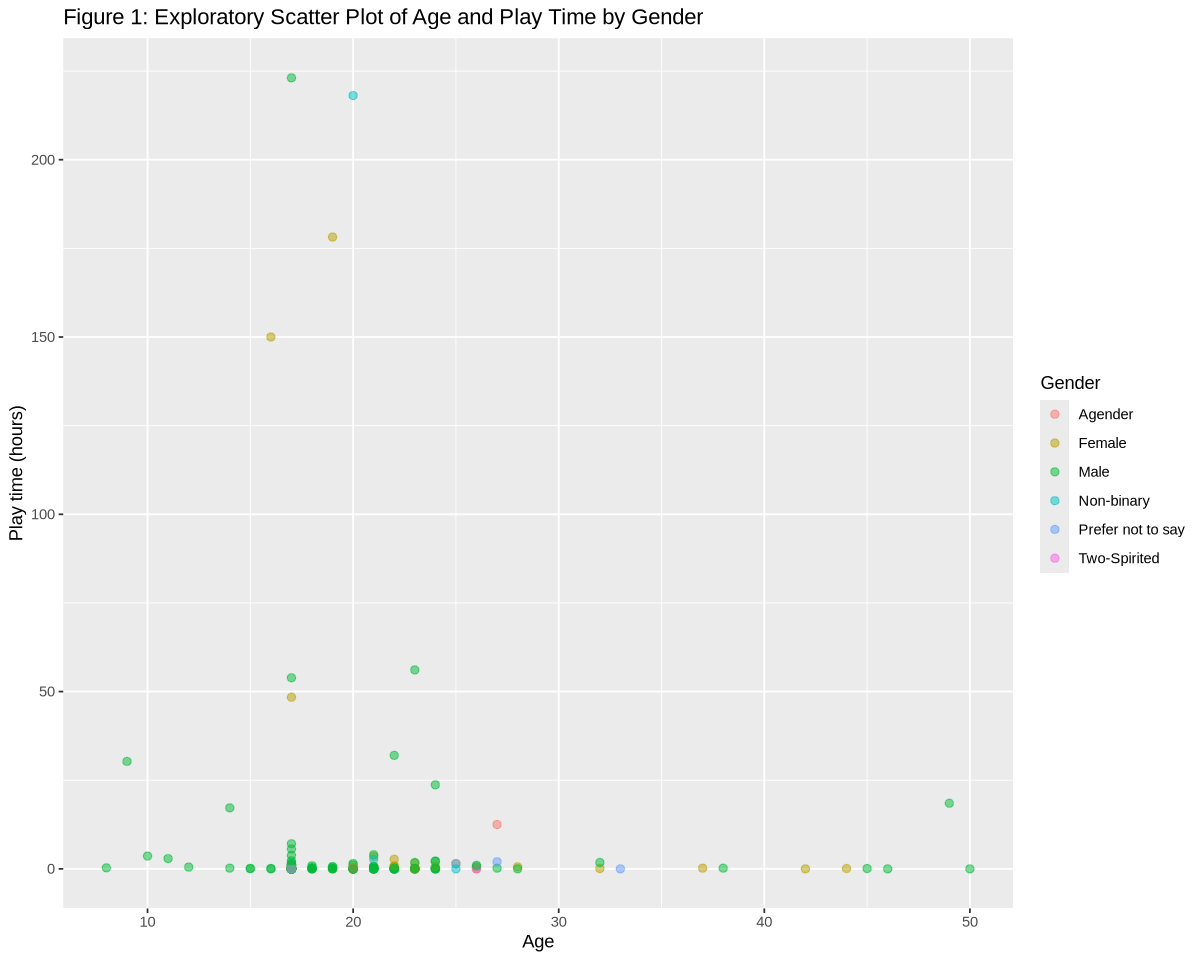

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)

players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = gender)) +
    geom_point(alpha = 0.5, size = 2) +
    labs(title = "Figure 1: Exploratory Scatter Plot of Age and Play Time by Gender", x = "Age", y = "Play time (hours)", color = "Gender")
players_plot

**Data Spread & Centering**:
- The majority of the data is concentrated between ages 10–30 and play times of 0–50 hours.
- There are a few extreme outliers with very high play times (at and above 150 hours), particularly between ages 15–25.

**Distribution & Clusters**:
- There is no clear linear or strong relationship between age and play time, the points are widely scattered.
- Most individuals, regardless of gender, seem to play less than 50 hours.
- No obvious clusters or subgroups based on gender alone, though most players appear to identify as Male or Female.

After visualizing the distribution of play time across gender identities, I noticed that several gender categories (e.g. Non-binary, Two-Spirited) had very few data points. To avoid unreliable regression estimates due to small sample sizes, I decided to group all non-male and non-female identities into a single "other_gender" category prior to modeling.

## Data analysis

In this project, 
- The response variable is `played_hours` is a numeric value.
- The goal is to quantify relationships between predictors and the response variable, not classify or group data.
- The predictors include both continuous (`Age`) and categorical (`gender`) values.

A **regression model** would be well-suited for this analysis.

As stated above, I grouped the underrepresented gender identities together into a single **other_gender** category.

In [9]:
other_gender <- c("Agender", "Non-binary", "Two-Spirited")  

players <- players |>
  mutate(gender = as.character(gender)) |>         
  mutate(gender = ifelse(gender %in% other_gender, "other_gender", gender)) |>
  mutate(gender = as.factor(gender))     
players

Age,gender,played_hours
<dbl>,<fct>,<dbl>
9,Male,30.3
17,Male,3.8
17,Male,0.0
21,Female,0.7
21,Male,0.1
17,Female,0.0
19,Female,0.0
21,Male,0.0
17,Male,0.1


I split the players dataset into **training and testing sets** for model evaluation, allowing me to train the models on one portion of the data and assess their performance on unseen data.

In [10]:
set.seed(17)

players_split <- initial_split(players, prop = 0.75)
players_training <- training(players_split)
players_testing <- testing(players_split)

### Model building (and model tuning for k-NN)

To model the relationship between player characteristics and total play time, I implemented and compared two regression models: **linear regression** and **k-nearest neighbors (k-NN) regression**.

While I initially hypothesized that linear regression would perform better due to the expected simplicity and linearity in the relationship between age, gender, and play time, I still tested k-NN as a non-parametric alternative. k-NN regression can capture complex, non-linear relationships, which could potentially fit the data better if strong interactions or non-linear patterns existed.

By comparing both models using the evaluation metric RMSE on the test data, I was able to confirm whether my initial assumption held true.

In [11]:
# Build linear Regression Model.

lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")
lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


In [12]:
# Build k-NN Regression Model.

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(played_hours ~ Age + gender, data = players_training) |>
    step_dummy(all_nominal_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

knn_workflow <- workflow() |>
                     add_recipe(knn_recipe) |>
                     add_model(knn_spec)

# Model tuning

set.seed(170)

gridvals <- tibble(neighbors = seq(1, 30, by = 2))

knn_results <- knn_workflow |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,34.62361648,5,8.358059946,Preprocessor1_Model01
1,rsq,standard,0.01095405,5,0.003354602,Preprocessor1_Model01
3,rmse,standard,30.85144769,5,9.192076477,Preprocessor1_Model02
3,rsq,standard,0.01555578,5,0.006533558,Preprocessor1_Model02
5,rmse,standard,30.22616539,5,8.318965308,Preprocessor1_Model03
5,rsq,standard,0.03609621,5,0.021675470,Preprocessor1_Model03
7,rmse,standard,29.24788812,5,8.894779070,Preprocessor1_Model04
7,rsq,standard,0.03405853,5,0.016795148,Preprocessor1_Model04
9,rmse,standard,30.56321716,5,8.052012707,Preprocessor1_Model05


### Model training

In [13]:
# Train Linear Regression Model.

lm_fit <- lm_spec |>
    fit(played_hours ~ Age + gender, data = players_training)

In [14]:
# Train k-NN Regression Model.

best_k <- knn_results |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    slice(1) |>
    pull(neighbors)

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_best_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_best_spec) |>
    fit(data = players_training)

### Model Evaluation

In [15]:
# Evaluate Linear Regression Model.

lm_test_predictions <- lm_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

lm_metrics <- lm_test_predictions |>
    metrics(truth = played_hours, estimate = .pred)
lm_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.985369186
rsq,standard,0.003953913
mae,standard,6.726140943


In [16]:
# Evaluate k-NN Regression Model.

knn_test_predictions <- knn_best_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

knn_metrics <- knn_test_predictions |>
  metrics(truth = played_hours, estimate = .pred)
knn_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11.47649337
rsq,standard,0.01174173
mae,standard,6.78279883


To evaluate and compare the performance of the linear regression and k-nearest neighbors (k-NN) regression models, I used the **Root Mean Squared Error (RMSE)** metric. RMSE is commonly used in regression tasks because it summarizes the average magnitude of prediction error in the same units as the response variable (`played_hours` in this case). A lower RMSE indicates better model performance, as it suggests that the model’s predictions are closer to the actual values.

In [17]:
# Extract the RMSE value of the Linear Regression Model.

lm_rmse <- lm_metrics |>
  filter(.metric == "rmse") |>
  pull(.estimate)
lm_rmse

[1] 7.985369

In [18]:
# Extract the RMSE value of the k-NN Regression Model.

knn_rmse <- knn_metrics |>
  filter(.metric == "rmse") |>
  pull(.estimate)
knn_rmse

[1] 11.47649

The RMSE for the **linear regression model** was **7.99**, while the RMSE for the **k-nearest neighbors (k-NN) regression model** was **8.58**. Since RMSE represents the average prediction error in the same units as the response variable (played_hours), a lower value indicates better predictive accuracy.

In this case, the **linear regression model performed slightly better than the k-NN regression model**, with an average error that is approximately **0.6 hours lower**. Although the difference is modest, it suggests that the relationship between `Age`, `gender`, and `played_hours` is likely linear or close to linear, which the linear model captures more effectively.

Therefore, I chose the linear regression model as the final model because it yielded better performance on the test data and provides more interpretable coefficients for understanding the effect of predictors.

However, I will also visualize the predictions of both models on the test set to qualitatively assess their behavior and ensure the final decision is well-supported.

### Model visualization

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

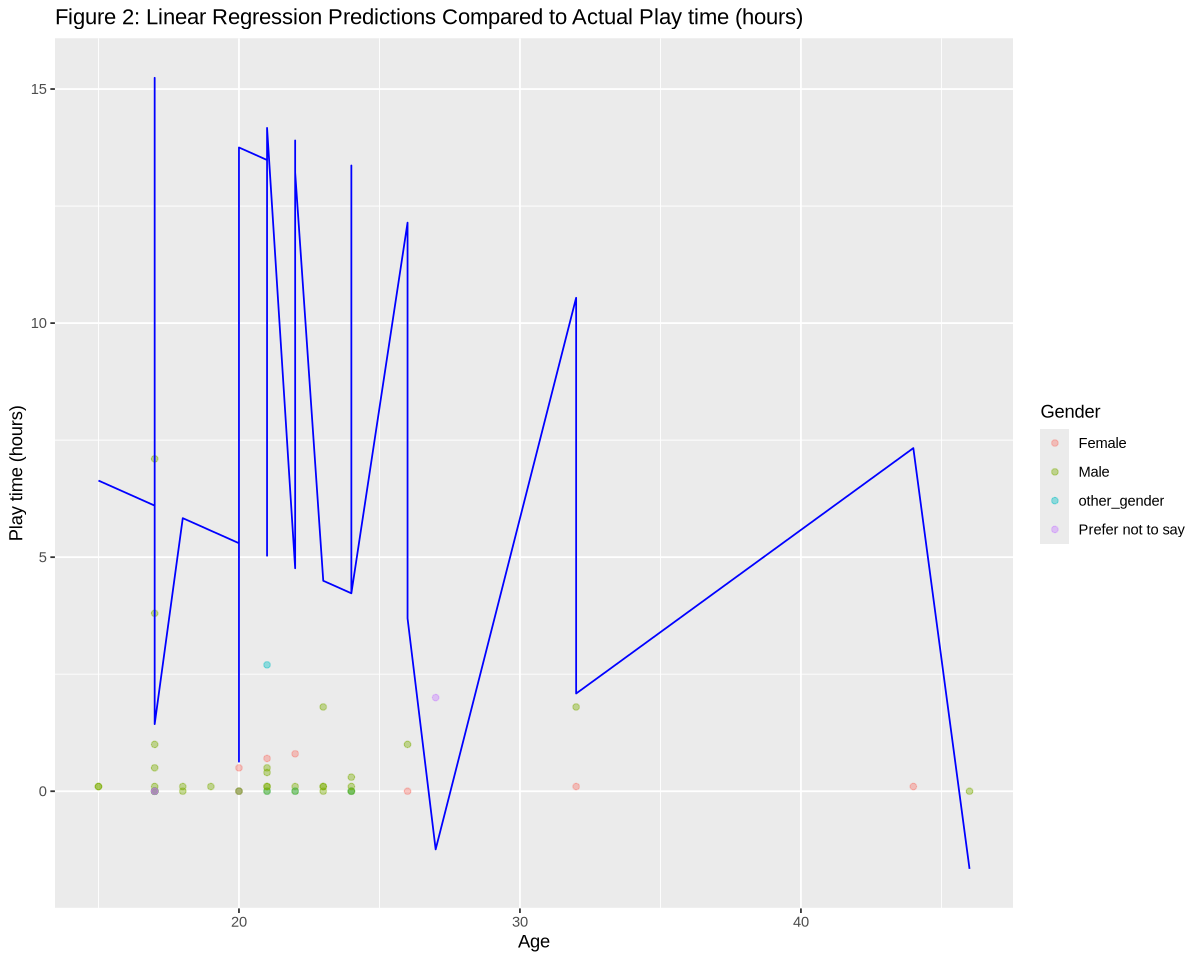

In [19]:
# Visualize Linear Regression Model.

options(repr.plot.width = 10, repr.plot.height = 8)

lm_preds_plot <- lm_test_predictions |>
    ggplot(aes(x = Age, y = played_hours, color = gender)) +
        geom_point(alpha = 0.4) +
        geom_line(
            mapping = aes(x = Age, y = .pred), 
            color = "blue") +
        labs(x = "Age", y = "Play time (hours)", color = "Gender", title = "Figure 2: Linear Regression Predictions Compared to Actual Play time (hours)")
        theme(text = element_text(size = 20))
lm_preds_plot

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

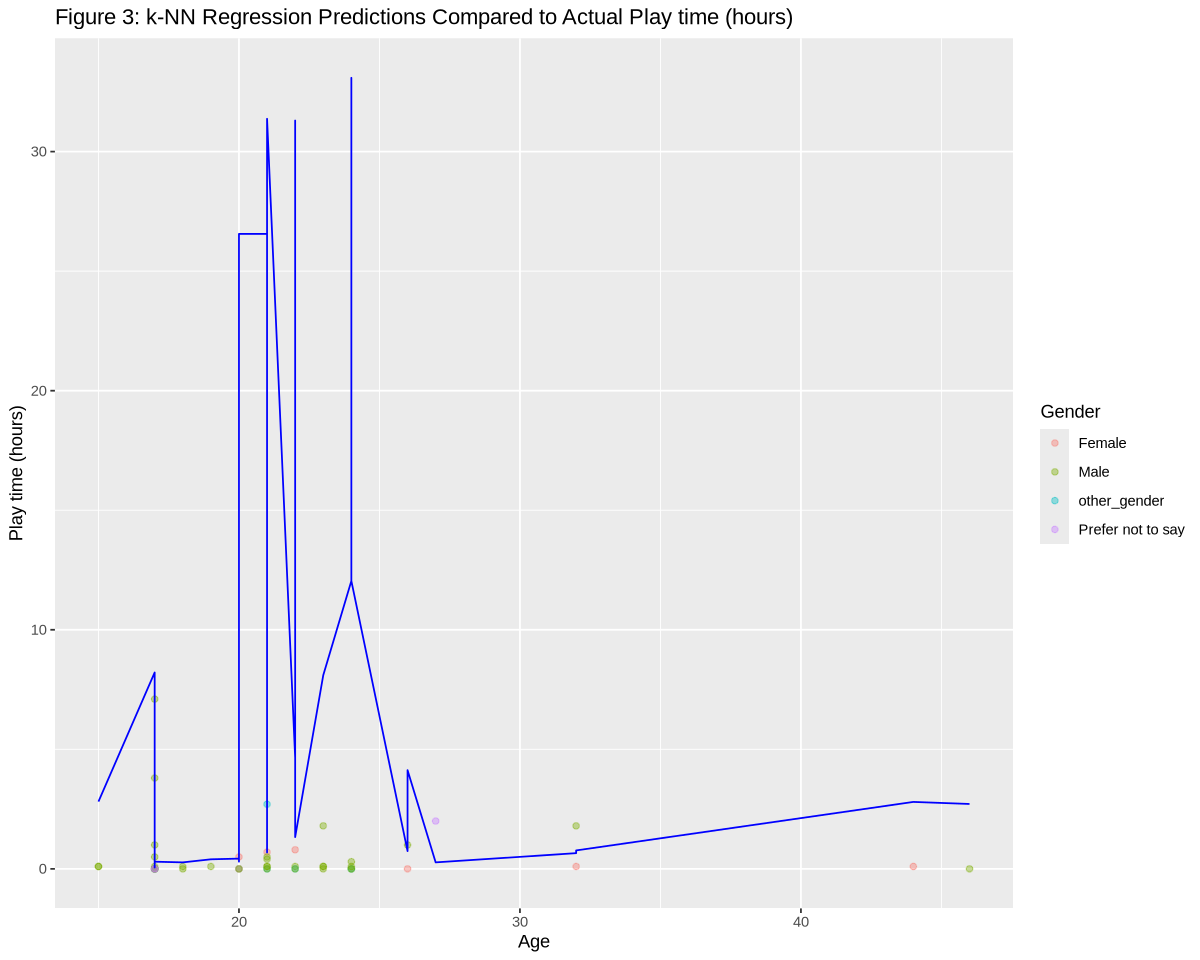

In [20]:
# Visualize k-NN Regression Model.

options(repr.plot.width = 10, repr.plot.height = 8)

knn_preds_plot <- knn_test_predictions |>
    ggplot(aes(x = Age, y = played_hours, color = gender)) +
        geom_point(alpha = 0.4) +
        geom_line(
            mapping = aes(x = Age, y = .pred), 
            color = "blue") +
        labs(x = "Age", y = "Play time (hours)", color = "Gender", title = "Figure 3: k-NN Regression Predictions Compared to Actual Play time (hours)")
        theme(text = element_text(size = 20))
knn_preds_plot

The prediction plots for both the linear regression and k-NN models display **jagged, abrupt jumps** rather than smooth trends. This outcome was somewhat expected, as exploratory data analysis revealed no strong or consistent relationship between the predictor and the response variable, indicating high variability or noise in the data.

Despite the irregular predictions, the linear regression model achieved a lower RMSE compared to k-NN, suggesting it captured the overall pattern in the data more effectively. The jaggedness in both models likely reflects underlying noise or sudden changes in the data that are difficult to model with these approaches. 

### Final Visual Assessment of the Linear Regression Model

To further explore the relationship between `Age`, `gender` and `played_hours`, I visualized only the actual data points without the predicted values. This made it easier to observe that the data exhibits high variability with no apparent trend, which aligns with earlier exploratory data analysis findings. 

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

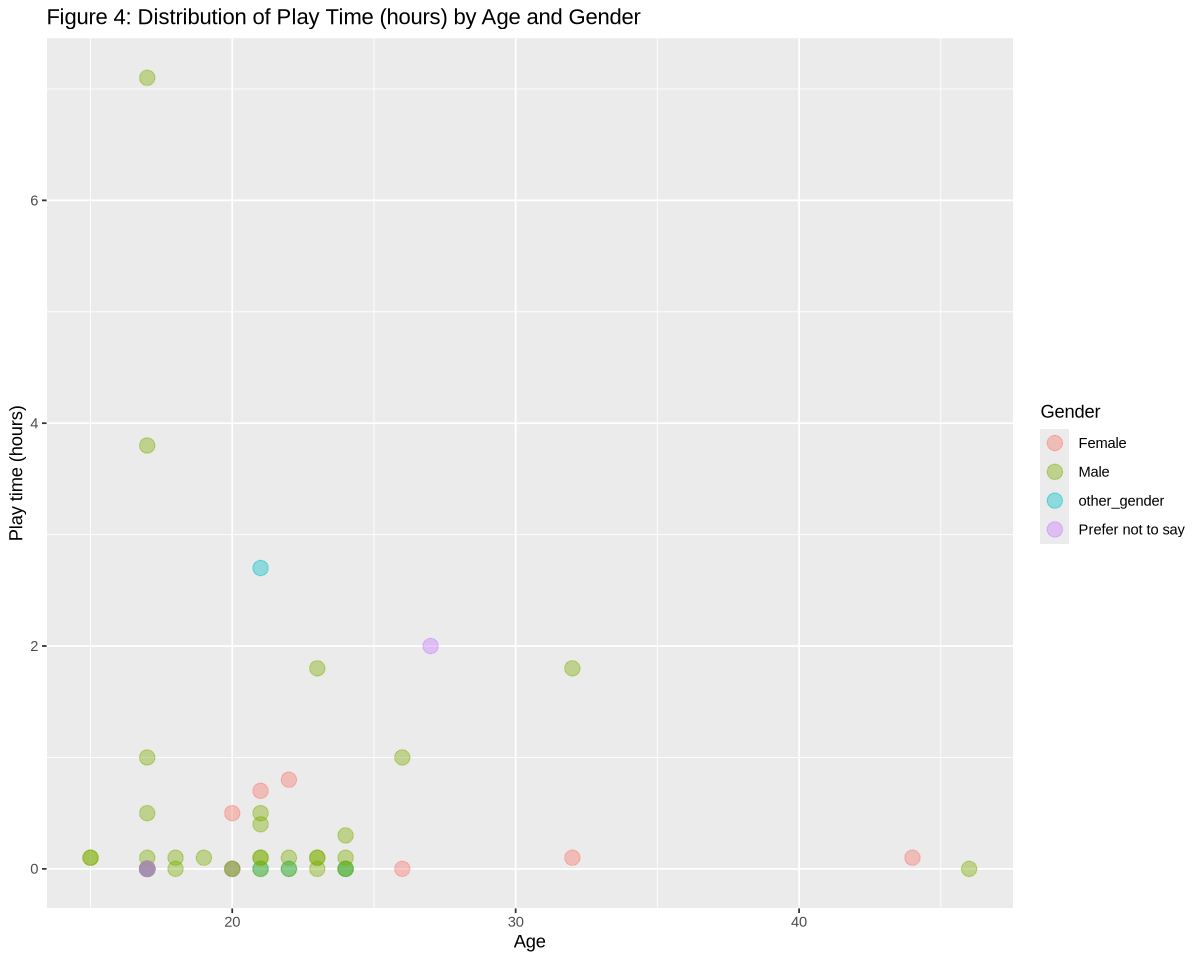

In [21]:
# Visualize Linear Regression Model.

options(repr.plot.width = 10, repr.plot.height = 8)

final_plot <- lm_test_predictions |>
    ggplot(aes(x = Age, y = played_hours, color = gender)) +
        geom_point(alpha = 0.4, size = 4) +
        labs(x = "Age", y = "Play time (hours)", color = "Gender", title = "Figure 4: Distribution of Play Time (hours) by Age and Gender")
        theme(text = element_text(size = 20))
final_plot

Figure 4 shows a scatter plot of actual play time by `Age` and `gender`. The data points are **widely scattered without a clear overall trend**. However, despite the lack of a clear linear relationship, some clusters and patterns related to gender and age groups can be observed. This visualization supports the choice of regression methods to explore potential predictive relationships.

# Discussion 

The goal of this analysis was to assess whether age and gender can predict players' total playtime on the Minecraft research server using linear and k-nearest neighbors (k-NN) regression models.

## Summary of Findings

The scatterplot of total play time by age and gender shows that **most players spent very little time on the Minecraft research server**, with the **majority clustered near zero play hours**. A few players across various age groups and genders showed slightly higher engagement, but extreme outliers were rare.
The regression models (both linear and k-NN) demonstrated **low predictive performance**, with RMSE values of 7.99 (linear) and 8.58 (k-NN) indicating that while there is a measurable relationship between the predictors and playtime, the predictive power is weak, and other variables are likely more influential. **This confirms that age and gender alone are weak predictors of total playtime.**

The scatterplot also shows that **male participants make up the majority of the dataset**, with noticeably more green dots than other gender categories. This indicates that the sample is gender-imbalanced, skewed toward males. Most of the male players have very low total playtime, clustered near 0 hours, though a few recorded slightly higher engagement (e.g., above 3 or 4 hours).

Female players (pink points) also appear in the younger and mid-age ranges, and a few of them recorded moderate playtime around 1 to 2 hours. However, no clear trend separates female and male players in terms of average engagement.

Other gender categories, including other_gender and Prefer not to say are underrepresented and appear only a few times on the plot. Interestingly, one “other_gender” participant played around 2.5 hours, which is on the higher end compared to others. Similarly, a “Prefer not to say” participant played for around 2 hours.

## Was This Expected?

These results were **partially expected**. 

Before analyzing the data, I expected **players around 20 years old to have higher total play time**, assuming they have more free time and stronger enthusiasm for gaming. I also anticipated that **play time would decrease with age**, as older players might face more responsibilities or less interest. Regarding gender, I thought **male and female players would both be well represented**.

In reality, the dataset was **dominated by male players**, with fewer female and other gender categories. The data showed **no clear link between age and play time**: most players, regardless of age or gender, had low play time. **No gender consistently had higher engagement**, suggesting other factors influence play behavior more than age or gender.

## Impact of Findings

These findings suggest that researchers using platforms like Minecraft **should not rely solely on demographic factors** when designing recruitment strategies. Instead, incorporating **behavior-based factors** (e.g., prior game play experience, subscription to a game-related newsletter) may provide more accurate insights into player engagement. These approaches can help build interventions and content to the actual behavior patterns of players, leading to more effective outcomes.

## Future questions

This analysis raises several follow-up questions:

- What behavioural factors (e.g. prior game play experience, subscription to a game-related newsletter) can better predict play time?

- Could adding variables like start time or end time improve model performence?

- Do social factors (e.g., whether users played with friends) influence play time?